In [1]:
import numpy as np
import sempler
import sempler.generators
import src.utils as utils
import src.metrics as metrics

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec

import pickle
import os


import time

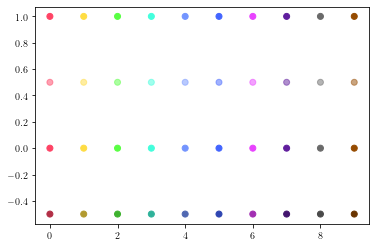

In [2]:
# Set tex formatting for plots
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.serif"] = ["Computer Modern Roman"]

# Set legend size
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')

# Colors
def to_rgb(H, b=1, a=1):
    RGBa = []
    for h in H:
        h = h.lstrip("#")
        RGBa.append(tuple(int(h[i:i+2], 16) / 256 * b for i in (0, 2, 4)) + (a,))
    return np.array(RGBa)

cmap = matplotlib.cm.get_cmap('tab20')
# Colorblind safe palettes
base = ['#d73027', '#f46d43', '#fdae61', '#fee090', '#020202', '#abd9e9', '#74add1', '#4575b4']
#base = ['#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#d1e5f0', '#92c5de', '#4393c3', '#2166ac']
#base = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#c7eae5', '#80cdc1', '#35978f', '#01665e']
# Rainbow palette
base = ["#ff4365", "#ffdd43", "#59ff43", "#43ffdd", "#7395ff", "#4365ff", "#e943ff", "#601e9e", "#6a6a6a", "#964b00"]#np.array([cmap(i) for i in range(2,20)])
plt.scatter(np.arange(len(base)), np.ones(len(base)), c = base)
#base = [base[i] for i in [0,1,3]]
colors = to_rgb(base)
colorsa = to_rgb(base, a=0.5)
colorsb = to_rgb(base, b=0.7)
plt.scatter(np.arange(len(colors)), np.zeros(len(colors)), c = colors)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*0.5, c = colorsa)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*-0.5, c = colorsb)

## Load results

In [3]:
directory = "synthetic_experiments/dataset_1657817021_runs:10_seed:42_G:100_k:2.7_p:10_w_min:0.5_w_max:1_v_min:1_v_max:2_envs:4_i_type:noise_i_size:1_i_v_min:5_i_v_max:10_n:10,100,1000_obs:1/"

In [4]:
test_cases = utils.read_pickle(directory + 'test_cases.pickle')
Ns = sorted(test_cases['Ns'])

**GnIES**

In [5]:
gnies_args, gnies_results = utils.read_pickle(directory + "compiled_results_gnies.pickle")
ground_truth, gnies_metrics = utils.read_pickle(directory + "metrics_gnies.pickle")
gnies_lambdas = gnies_args[2]
gnies_lambdas

[0.01, 0.25, 0.5, 0.75, 1.0]

In [6]:
gnies_metrics[metrics.success_metric].mean()

1.0

**UT-IGSP**

In [7]:
ut_igsp_args, ut_igsp_results = utils.read_pickle(directory + "compiled_results_ut_igsp.pickle")
ground_truth, utigsp_metrics = utils.read_pickle(directory + "metrics_ut_igsp.pickle")
utigsp_alphas, utigsp_betas = ut_igsp_args[1], ut_igsp_args[2]
utigsp_alphas, utigsp_betas

(array([1.00000e-05, 2.50075e-02, 5.00050e-02, 7.50025e-02, 1.00000e-01]),
 array([1.00000e-05, 2.50075e-02, 5.00050e-02, 7.50025e-02, 1.00000e-01]))

In [8]:
utigsp_metrics[metrics.success_metric].mean()

0.9710933333333334

**UT-IGSP+**

In [9]:
ut_igsp_plus_args, ut_igsp_plus_results = utils.read_pickle(directory + "compiled_results_ut_igsp_plus.pickle")
ground_truth, utigsp_plus_metrics = utils.read_pickle(directory + "metrics_ut_igsp_plus.pickle")
utigsp_plus_alphas, utigsp_plus_betas = ut_igsp_args[1], ut_igsp_args[2]
utigsp_plus_alphas, utigsp_plus_betas

(array([1.00000e-05, 2.50075e-02, 5.00050e-02, 7.50025e-02, 1.00000e-01]),
 array([1.00000e-05, 2.50075e-02, 5.00050e-02, 7.50025e-02, 1.00000e-01]))

In [10]:
utigsp_plus_metrics[metrics.success_metric].mean()

0.9710933333333334

**GES**

In [11]:
ges_args, ges_results = utils.read_pickle(directory + "compiled_results_ges.pickle")
ground_truth, ges_metrics = utils.read_pickle(directory + "metrics_ges.pickle")
ges_lambdas = ges_args[2]
ges_lambdas

[0.01, 0.25, 0.5, 0.75, 1.0]

In [12]:
ges_metrics[metrics.success_metric].mean()

1.0

**GnIES with rank**

gnies_rank_args, gnies_rank_results = utils.read_pickle(directory + "compiled_results_gnies_rank.pickle")
ground_truth, gnies_rank_metrics = utils.read_pickle(directory + "metrics_gnies_rank.pickle")
gnies_rank_lambdas = gnies_rank_args[2]
gnies_rank_lambdas

gnies_rank_metrics[metrics.success_metric].mean()

## Figures

### Figure 1: Class recovery trajectories

In [13]:
gnies_x = np.nanmean(gnies_metrics[metrics.type_1_structc], axis=(0,3))
gnies_y = np.nanmean(gnies_metrics[metrics.type_2_structc], axis=(0,3))

utigsp_x = np.nanmean(utigsp_metrics[metrics.type_1_structc], axis=(0,4))
utigsp_y = np.nanmean(utigsp_metrics[metrics.type_2_structc], axis=(0,4))

utigsp_plus_x = np.nanmean(utigsp_plus_metrics[metrics.type_1_structc], axis=(0,4))
utigsp_plus_y = np.nanmean(utigsp_plus_metrics[metrics.type_2_structc], axis=(0,4))

ges_x = np.nanmean(ges_metrics[metrics.type_1_structc], axis=(0,3))
ges_y = np.nanmean(ges_metrics[metrics.type_2_structc], axis=(0,3))

gnies_rank_x = np.nanmean(gnies_rank_metrics[metrics.type_1_structc], axis=(0,3))
gnies_rank_y = np.nanmean(gnies_rank_metrics[metrics.type_2_structc], axis=(0,3))

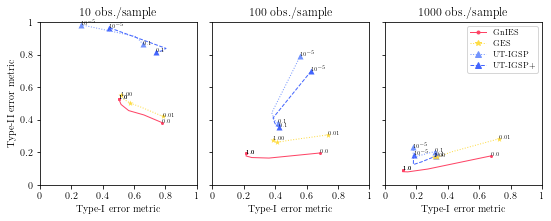

In [14]:
text = True
textsize = 5
lineopts = {'linewidth': 1}
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
marker = {'gnies': '.',
          'gnies_rank': '.',
          'ges': '*',
          'ut_igsp': '^',
          'ut_igsp+': '^',
          'jci_pc': 's',           
}
style = {'gnies': '-',
         'gnies_rank': ':',
         'ges': ':',
         'ut_igsp': ':',
         'ut_igsp+': '--',
         'jci_pc': ':',
           
}
color = {'gnies': colors[0],
         'gnies_rank': colorsa[0],
         'ges': colors[1],
         'ut_igsp': colors[4],
         'ut_igsp+': colors[5],
         'jci_pc': colors[2],
         
}

print_names = {'gnies': 'GnIES',
               #'gnies_rank': 'GnIES-rank',
               'ges': 'GES',
               'ut_igsp': 'UT-IGSP',
               'ut_igsp+': 'UT-IGSP+',
               #'jci_pc': 'JCI-PC',         
}


gs = gridspec.GridSpec(1, 3, wspace=0.10, hspace=0.2)
plt.figure(figsize=(9,3))
ax = plt.gca()

for i,n in enumerate(Ns):
    plt.subplot(gs[i])
    ax = plt.gca()
    
    # Plot GnIES
    ax.plot(gnies_x[:,i], gnies_y[:,i], color=color['gnies'], linestyle=style['gnies'], **lineopts)    
    for j in [0,4,len(gnies_lambdas) - 1]:
        ax.scatter(gnies_x[j,i], gnies_y[j,i], color=color['gnies'], marker=marker['gnies'], linewidth=0)
        l = gnies_lambdas[j]
        if text and l!=0.5:
            ax.text(gnies_x[j,i], gnies_y[j,i], "$%0.1f$" % l, fontsize=textsize)
            
    # Plot GnIES-rank
#    ax.plot(gnies_rank_x[:,i], gnies_rank_y[:,i], color=color['gnies_rank'], linestyle=style['gnies_rank'], **lineopts)    
#    for j in [0,2,len(gnies_rank_lambdas) - 1]:
#        ax.scatter(gnies_rank_x[j,i], gnies_rank_y[j,i], color=color['gnies_rank'], marker=marker['gnies_rank'], linewidth=0)
#        l = gnies_rank_lambdas[j]
#        if text and l!=0.5:
#            ax.text(gnies_rank_x[j,i], gnies_rank_y[j,i], "$%0.1f$" % l, fontsize=textsize)

        
    # Plot UT-IGSP
    idx = list(range(len(utigsp_alphas)))
    ax.plot(utigsp_x[idx,idx,i], utigsp_y[idx,idx,i], color=color['ut_igsp'], marker=None, linestyle=style['ut_igsp'], **lineopts)
    for j in [0,len(utigsp_alphas) - 1]:
        ax.scatter(utigsp_x[j,j,i], utigsp_y[j,j,i], color=color['ut_igsp'], marker=marker['ut_igsp'], linewidth=0)
        a = utigsp_alphas[j]
        if text:
            lbl = "$10^{-5}$" if a < 0.1 else "$%0.1f$"
            ax.text(utigsp_x[j,j,i], utigsp_y[j,j,i], lbl % a, fontsize=textsize)

    # Plot UT-IGSP+
    idx = list(range(len(utigsp_plus_alphas)))
    ax.plot(utigsp_plus_x[idx,idx,i], utigsp_plus_y[idx,idx,i], color=color['ut_igsp+'], marker=None, linestyle=style['ut_igsp+'], **lineopts)
    for j in [0,len(utigsp_plus_alphas) - 1]:
        ax.scatter(utigsp_plus_x[j,j,i], utigsp_plus_y[j,j,i], color=color['ut_igsp+'], marker=marker['ut_igsp+'], linewidth=0)
        if text:
            a = utigsp_plus_alphas[j]
            lbl = "$10^{-5}$" if a < 0.001 else "$%0.1f$"
            ax.text(utigsp_plus_x[j,j,i], utigsp_plus_y[j,j,i], lbl % a, fontsize=textsize)

    # Plot GES
    ax.plot(ges_x[:,i], ges_y[:,i], color=color['ges'], linestyle=style['ges'], **lineopts)    
    for j in [0,2,len(ges_lambdas) - 1]:
        l = ges_lambdas[j]
        ax.scatter(ges_x[j,i], ges_y[j,i], color=color['ges'], marker=marker['ges'], linewidth=0)
        if l!=0.5 and text:
            ax.text(ges_x[j,i], ges_y[j,i], "$%0.2f$" % l, fontsize=textsize)

    
    
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('Type-I error metric')
    ax.set_title("%d obs./sample" % n)
    ax.set_ylabel('Type-II error metric') if i == 0 else None
    ax.set_yticks(ticks)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_yticklabels([]) if i != 0 else ax.set_yticklabels(ticks)


# Build legend
method_entries = [Line2D([0], [0],
                         linewidth=1,
                         linestyle=style[method],
                         marker=marker[method],
                         color=color[method]) for method in print_names.keys()]
method_str = list(print_names.values())
ax.legend(method_entries, #+ sample_size_entries
          method_str, # + sample_size_str
          prop={'size':8},
          loc='upper right',
        ncol=1)


plt.savefig('figures/figure_1.pdf', bbox_inches='tight')

### Recovery of I-CPDAG

In [15]:
gnies_y = np.nanmean(computed_metrics['gnies'][metrics.recovered_icpdag], axis=(0,3))
utigsp_y = np.nanmean(computed_metrics['ut_igsp'][metrics.recovered_icpdag], axis=(0,4))

NameError: name 'computed_metrics' is not defined

In [ ]:
plt.figure(figsize=(4,4))
ax = plt.gca()

x_axis = range(len(Ns))
# Plot GnIES
for i,l in enumerate(gnies_lambdas):    
    ax.plot(x_axis, gnies_y[i,:], label="l=%0.2f" % l, marker='o', linestyle=':')

        
# Plot UT-IGSP
for j,a in enumerate(utigsp_alphas):
    for k,b in enumerate(utigsp_betas):
        if j==k:
            ax.plot(x_axis, utigsp_y[j,k,:])            

ax.set_ylim([0,1])
ax.set_xticks(x_axis)
ax.set_xticklabels(Ns)
plt.legend()

In [ ]:
# Above: ranking, below: greedy approach 

### Skeleton recovery

In [ ]:
gnies_x = np.nanmean(computed_metrics['gnies'][metrics.type_1_skeleton], axis=(0,3))
gnies_y = 1 - np.nanmean(computed_metrics['gnies'][metrics.type_2_skeleton], axis=(0,3))

utigsp_x = np.nanmean(computed_metrics['ut_igsp'][metrics.type_1_skeleton], axis=(0,4))
utigsp_y = 1 - np.nanmean(computed_metrics['ut_igsp'][metrics.type_2_skeleton], axis=(0,4))

In [ ]:
styles = [':', '--', '-']
text = True

plt.figure(figsize=(10,10))
ax = plt.gca()

# Plot GnIES
for i,n in enumerate(Ns):
    ax.plot(gnies_x[:,i], gnies_y[:,i], label="n=%d" % n, color=colors[0], linestyle=styles[i], marker='.')
    if text:
        for j,l in enumerate(gnies_lambdas):
            ax.text(gnies_x[j,i], gnies_y[j,i], "%.2f" % l, fontsize=8)
        
# Plot UT-IGSP
for i,n in enumerate(Ns):    
    #ax.scatter(utigsp_x[:,:,i], utigsp_y[:,:,i], label="n=%d" % n, color=colors[i], marker='^')
    idx = list(range(len(utigsp_alphas)))
    ax.plot(utigsp_x[idx,idx,i], utigsp_y[idx,idx,i], label="n=%d" % n, color=colors[1], marker='.', linestyle=styles[i])
    if text:
        for j,a in enumerate(utigsp_alphas):
            for k,b in enumerate(utigsp_betas):
                if k == j:
                    ax.text(utigsp_x[j,k,i], utigsp_y[j,k,i], "%.2f, %.2f" % (a,b), fontsize=8)
ax.axis('equal')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
plt.legend()

In [ ]:
# Above: ranking, below: greedy approach 

### Targets recovery

In [ ]:
gnies_x = np.nanmean(computed_metrics['gnies'][metrics.type_1_I], axis=(0,3))
gnies_y = 1 - np.nanmean(computed_metrics['gnies'][metrics.type_2_I], axis=(0,3))

utigsp_x = np.nanmean(computed_metrics['ut_igsp'][metrics.type_1_I], axis=(0,4))
utigsp_y = 1 - np.nanmean(computed_metrics['ut_igsp'][metrics.type_2_I], axis=(0,4))

In [ ]:
styles = [':', '--', '-']
text = True

plt.figure(figsize=(10,10))
ax = plt.gca()

# Plot GnIES
for i,n in enumerate(Ns):
    ax.plot(gnies_x[:,i], gnies_y[:,i], label="n=%d" % n, color=colors[0], linestyle=styles[i], marker='.')
    if text:
        for j,l in enumerate(gnies_lambdas):
            ax.text(gnies_x[j,i], gnies_y[j,i], "%.2f" % l, fontsize=8)
        
# Plot UT-IGSP
for i,n in enumerate(Ns):    
    #ax.scatter(utigsp_x[:,:,i], utigsp_y[:,:,i], label="n=%d" % n, color=colors[i], marker='^')
    idx = list(range(len(utigsp_alphas)))
    ax.plot(utigsp_x[idx,idx,i], utigsp_y[idx,idx,i], label="n=%d" % n, color=colors[1], marker='.', linestyle=styles[i])
    if text:
        for j,a in enumerate(utigsp_alphas):
            for k,b in enumerate(utigsp_betas):
                if k == j:
                    ax.text(utigsp_x[j,k,i], utigsp_y[j,k,i], "%.2f, %.2f" % (a,b), fontsize=8)
ax.axis('equal')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
plt.legend()

In [ ]:
# Above: ranking, below: greedy approach 

In [ ]:
import gnies
import src.metrics
A = sempler.generators.dag_full(p=5)
cpdag = gnies.utils.dag_to_cpdag(A)
all_dags = gnies.utils.all_dags(cpdag)
len(all_dags)

In [ ]:
for i in range(100):
    A = sempler.generators.dag_avg_deg(p=5, k=2)
    cpdag = gnies.utils.dag_to_cpdag(A)
    all_dags_A = gnies.utils.all_dags(cpdag)    
    t1 = src.metrics.type_1_structc(all_dags, all_dags_A)
    t2 = src.metrics.type_2_structc(all_dags, all_dags_A)    
    print("t1 : %0.3f - t2 : %0.3f" % (t1, t2))
    #print("  len(all_dags_A) =", len(all_dags_A))